In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import datetime
from scipy import optimize 
import functools 

def fvschedule(principal, schedule=[]):
    """
    Calculates future value with a variable interest rate schedule.
    """
    return functools.reduce(lambda x, y: x + (x * y), schedule, principal)

In [3]:
data = pd.read_csv('stockdata.csv',index_col = 0)
df = pd.DataFrame(data)

df.head()

,NVDA,CR,XOM,GS,PCG
date,,,,,
1/23/2017,103.984764,67.996445,75.004539,222.075165,59.599167
1/24/2017,106.201210,70.195663,75.110458,223.039154,59.501442
1/25/2017,106.656372,71.026268,75.331146,226.446579,59.452583
1/26/2017,108.496826,70.412766,75.560638,228.670486,59.374409
1/27/2017,110.594505,70.176781,75.481201,226.160278,59.237598


In [4]:
returns_NaN = df.pct_change()
returns = returns_NaN.drop(['1/23/2017'])
returns.head()

,NVDA,CR,XOM,GS,PCG
date,,,,,
1/24/2017,0.021315,0.032343,0.001412,0.004341,-0.001640
1/25/2017,0.004286,0.011833,0.002938,0.015277,-0.000821
1/26/2017,0.017256,-0.008638,0.003046,0.009821,-0.001315
1/27/2017,0.019334,-0.003351,-0.001051,-0.010977,-0.002304
1/30/2017,-0.015657,-0.006052,-0.007601,-0.012872,-0.000660


In [5]:
n_assets = 5
companies = ['NVDA','CR','XOM','GS','PCG']
return_arr = []

for i in range(n_assets):
    expected_returns = fvschedule(1,returns[companies[i]])**(1/3)-1
    return_arr.append(expected_returns)
    
    print(expected_returns,companies[i])
print("")

print(return_arr)
print("")

mean_returns = np.average(return_arr)
print(mean_returns)
print("")

corr = returns.corr()
print(corr)
print("")

cov = returns.cov()
print("Covariance Matrix","="*100)
print(cov)

0.3405029654386045 NVDA
0.07942835751740418 CR
-0.04018914530576445 XOM
0.028941282997861695 GS
-0.38697698112069834 PCG

[0.3405029654386045, 0.07942835751740418, -0.04018914530576445, 0.028941282997861695, -0.38697698112069834]

0.004341295905481513

          NVDA        CR       XOM        GS       PCG
NVDA  1.000000  0.421046  0.317826  0.416574 -0.035310
CR    0.421046  1.000000  0.444526  0.506913  0.012640
XOM   0.317826  0.444526  1.000000  0.458980  0.069588
GS    0.416574  0.506913  0.458980  1.000000  0.042650
PCG  -0.035310  0.012640  0.069588  0.042650  1.000000

Covariance Matrix ====================================================================================================
          NVDA        CR       XOM        GS       PCG
NVDA  0.000747  0.000169  0.000096  0.000166 -0.000056
CR    0.000169  0.000217  0.000073  0.000109  0.000011
XOM   0.000096  0.000073  0.000123  0.000074  0.000045
GS    0.000166  0.000109  0.000074  0.000213  0.000036
PCG  -0.000056  0.0000

In [6]:
weights = np.array(np.random.random(5))
print('Random Weights:')
print(weights)
print("")

print('Rebalance')
weights = weights/np.sum(weights)
print(weights, "Total=", round(np.sum(weights),3))
print("")
print(return_arr)
print("")


Random Weights:
[0.97627899 0.88862844 0.82078304 0.06960036 0.23220321]

Rebalance
[0.3267886  0.29744944 0.27473964 0.02329724 0.07772508] Total= 1.0

[0.3405029654386045, 0.07942835751740418, -0.04018914530576445, 0.028941282997861695, -0.38697698112069834]



In [7]:
def port_returns(returns):
    portfolio_returns = (np.sum(weights * return_arr))
    
    return portfolio_returns

print(port_returns(returns),'Expected Portfolio Returns @ these weights: ', np.round(weights,4)*100)

0.0944532917659961 Expected Portfolio Returns @ these weights:  [32.68 29.74 27.47  2.33  7.77]


In [8]:
def port_std (returns):
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov, weights)))
    
    return portfolio_std

print(port_std(returns))

0.013987832307300772


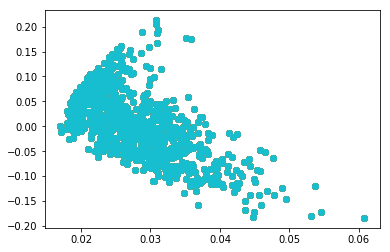

In [87]:
n_simulations = 1000

all_weights = []
var_arr90 = []
var_arr95 = []
var_arr99 = []
returns_arr = []
vol_arr = []
port_value = 1000000

confidence_90 = 1.645
confidence_95 = -1.96
confidence_99 = -2.575

for i in range(n_simulations):
    #generate random weights
    weights = np.array(np.random.random(n_assets))
    weights = weights/np.sum(weights)
    
    #index weights
    all_weights.append(weights)
    
    #index retunrs in array
    returns_arr.append(np.sum(weights * return_arr))
    
            
    #var calculation
    var90 = (confidence_90 * np.sqrt(np.dot(weights.T,np.dot(cov, weights))))
    var_arr90.append(var90)
    
    var95 = confidence_95 * np.sqrt(np.dot(weights.T,np.dot(cov, weights)))
    var_arr95.append(var95)

    var99 = confidence_99 * np.sqrt(np.dot(weights.T,np.dot(cov, weights)))
    var_arr99.append(var99)
    
    plt.plot(var_arr90, returns_arr, 'o')
    #plt.plot(var_arr95, returns_arr, 'o')
    #plt.plot(var_arr99, returns_arr, 'o')

In [88]:
min_var = np.argmin(var_arr90)
print(min_var)

5


In [89]:
print(np.round(all_weights[min_var],4)*100)
print(returns_arr[min_var])

[ 3.85 19.88 55.83 17.81  2.64]
0.0014016187543331709


Text(0.016970331168018823, 0.0014016187543331709, 'Min Var Portfolio')

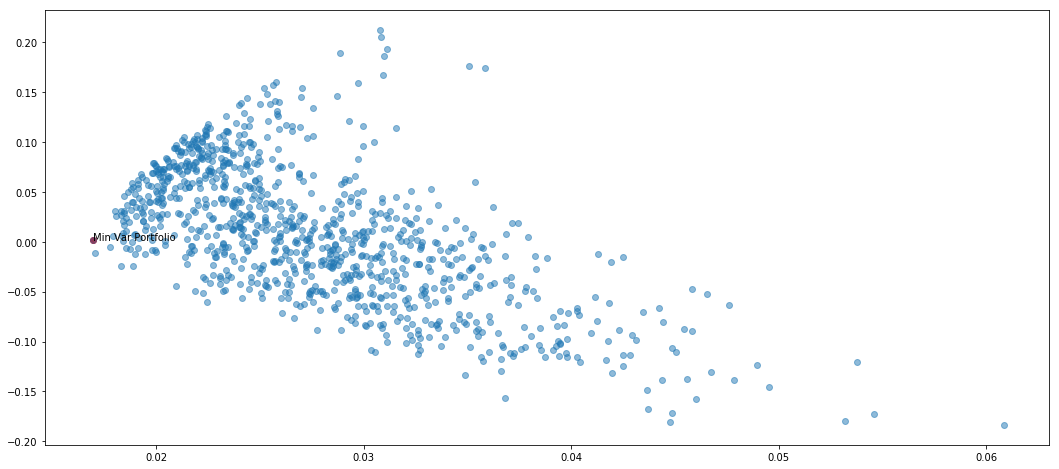

In [90]:
plt.figure(figsize=(18,8))
plt.plot(var_arr90, returns_arr, 'o', alpha=0.5)
plt.scatter(var_arr90[min_var],returns_arr[min_var], color="Red",alpha=1)
plt.annotate('Min Var Portfolio',xy=(var_arr90[min_var],returns_arr[min_var]))

In [93]:
max_var = np.argmax(var_arr90)
print(max_var)

63


In [94]:
print(np.round(all_weights[max_var],4)*100)
print(returns_arr[max_var])

[18.43  1.59 15.07  2.29 62.63]
-0.1837675953462743
